### Enron Analytics

In [42]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import string
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [43]:
df=pd.read_csv("enron_test.csv")

#### Understanding the data:
The data set contains 1000 records with 6 attributes that contain Data on Email such as Date of the Email, From (sender email address), To (Receiver email address), Subject of the email, Content in the email body and the new_date. 
This dataset has the email activity level of people regarding a series of measured metrics e.g. sent and received email addresses, etc.


In [44]:
#Dimension
df.shape

(1000, 6)

In [45]:
df.head()

,Date,From,To,Subject,content,new_date
0,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",frozenset({'phillip.allen@enron.com'}),frozenset({'tim.belden@enron.com'}),NaN,Here is our forecast\n\n,2001-05-14 23:39:00
1,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",frozenset({'phillip.allen@enron.com'}),frozenset({'john.lavorato@enron.com'}),Re:,Traveling to have a business meeting takes the...,2001-05-04 20:51:00
2,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",frozenset({'phillip.allen@enron.com'}),frozenset({'leah.arsdall@enron.com'}),Re: test,test successful. way to go!!!,2000-10-18 10:00:00
3,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",frozenset({'phillip.allen@enron.com'}),frozenset({'randall.gay@enron.com'}),NaN,"Randy,\n\n Can you send me a schedule of the s...",2000-10-23 13:13:00
4,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",frozenset({'phillip.allen@enron.com'}),frozenset({'greg.piper@enron.com'}),Re: Hello,Let's shoot for Tuesday at 11:45.,2000-08-31 12:07:00


In [46]:
df.columns

Index(['Date', 'From', 'To', 'Subject', 'content', 'new_date'], dtype='object')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1000 non-null   object
 1   From      1000 non-null   object
 2   To        995 non-null    object
 3   Subject   698 non-null    object
 4   content   1000 non-null   object
 5   new_date  1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB


In [48]:
#checking for null values
df.isnull().sum()

Date          0
From          0
To            5
Subject     302
content       0
new_date      0
dtype: int64

In [49]:
#filtering the values for rows To email is null
filtered_df = df[df['To'].notnull()]

In [50]:
filtered_df.isnull().sum()

Date          0
From          0
To            0
Subject     301
content       0
new_date      0
dtype: int64

We see that there are records where the Subject of the emails is missing/null.

In [51]:
filtered_df['From'].value_counts()

frozenset({'phillip.allen@enron.com'})                    944
frozenset({'critical.notice@enron.com'})                    5
frozenset({'ina.rangel@enron.com'})                         4
frozenset({'jsmith@austintx.com'})                          2
frozenset({'sarah.novosel@enron.com'})                      2
frozenset({'webmaster@earnings.com'})                       2
frozenset({'ei_editor@ftenergy.com'})                       2
frozenset({'announce@inbox.nytimes.com'})                   2
frozenset({'aod@newsdata.com'})                             2
frozenset({'christi.nicolay@enron.com'})                    1
frozenset({'grensheltr@aol.com'})                           1
frozenset({'rebecca.cantrell@enron.com'})                   1
frozenset({'billc@greenbuilder.com'})                       1
frozenset({'mark.whitt@enron.com'})                         1
frozenset({'philip.polsky@enron.com'})                      1
frozenset({'gthorse@keyad.com'})                            1
frozense

We can see that the highest number of emails are sent From "{'phillip.allen@enron.com'}"

In [52]:
filtered_df['To'].value_counts()

frozenset({'ina.rangel@enron.com'})                                                                                                                                                                                                                                                            66
frozenset({'jsmith@austintx.com'})                                                                                                                                                                                                                                                             60
frozenset({'stagecoachmama@hotmail.com'})                                                                                                                                                                                                                                                      59
frozenset({'pallen70@hotmail.com'})                                                                                               

The highest number of emal are received To "ina.rangel@enron.com"

Converting new_date variable to Datetime format

In [53]:
filtered_df['new_date']= pd.to_datetime(filtered_df['new_date'])

In [54]:
filtered_df['new_date']

0     2001-05-14 23:39:00
1     2001-05-04 20:51:00
2     2000-10-18 10:00:00
3     2000-10-23 13:13:00
4     2000-08-31 12:07:00
              ...        
995   2001-03-19 09:36:00
996   2001-03-19 08:45:00
997   2000-12-06 16:04:00
998   2001-03-16 12:28:00
999   2001-03-15 15:42:00
Name: new_date, Length: 995, dtype: datetime64[ns]

In [55]:
ls1= filtered_df['From'][0].split("'")[1]

In [56]:
From_email = filtered_df['From'].to_list()
From=[]
for i in range(len(From_email)):
    email1 = From_email[i].split("'")[1]
    From.append(email1)

In [57]:
filtered_df["From_email"]=From

In [58]:
filtered_df["new_date"].min()

Timestamp('1980-01-01 00:00:00')

In [59]:
filtered_df["new_date"].max()

Timestamp('2001-05-14 23:39:00')

In [60]:
monthly = filtered_df['new_date'].groupby([filtered_df.new_date.dt.year, filtered_df.new_date.dt.month]).agg('count')

Text(0.5, 0, 'Year, Month')

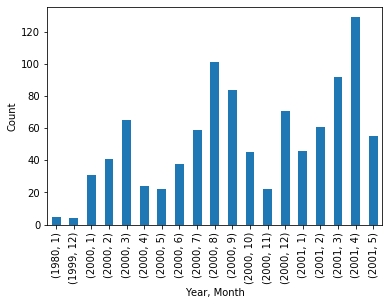

In [61]:
monthly.plot(kind='bar')
plt.ylabel("Count")
plt.xlabel("Year, Month")

From the above bar plot we could see that the email traffic is highest for april 2001

In [62]:
yearly = filtered_df['new_date'].groupby([filtered_df.new_date.dt.year]).agg('count')

Text(0.5, 0, 'Year')

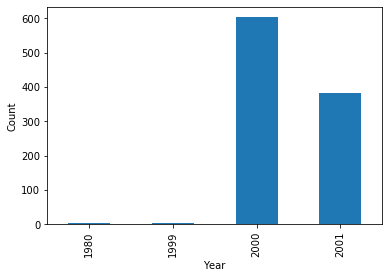

In [63]:
yearly.plot(kind='bar')
plt.ylabel("Count")
plt.xlabel("Year")

In [64]:
newdf = filtered_df.loc[(filtered_df.From_email=="phillip.allen@enron.com")]

In [65]:
newdf.shape

(944, 7)

In [66]:
from_phillip = newdf['new_date'].groupby([newdf.new_date.dt.year, newdf.new_date.dt.month]).agg('count')

Text(0.5, 0, 'Year, Month')

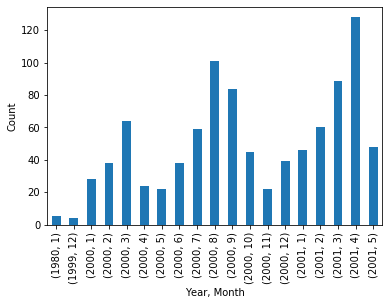

In [67]:
from_phillip.plot(kind='bar')
plt.ylabel("Count")
plt.xlabel("Year, Month")

In [68]:
#Filtering emails To "phillip.allen@enron.com"
referrer_index = filtered_df['To'].str.contains('phillip.allen@enron.com')
referrals = filtered_df[referrer_index]
referrals.count()

Date          10
From          10
To            10
Subject        8
content       10
new_date      10
From_email    10
dtype: int64

In [69]:
newdf1 = newdf.append(referrals)

In [70]:
newdf1.shape

(954, 7)

Text(0.5, 0, 'Year, Month')

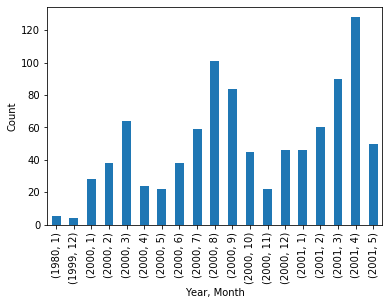

In [71]:
from_To_phillip = newdf1['new_date'].groupby([newdf1.new_date.dt.year, newdf1.new_date.dt.month]).agg('count')
from_To_phillip.plot(kind='bar')
plt.ylabel("Count")
plt.xlabel("Year, Month")

The Above bar chart shows the count of emails sent From and received To "phillip.allen@enron.com" on monthly basis.

In [72]:
#changing the content of the body to lower case
filtered_df['content']= filtered_df['content'].str.lower()
filtered_df['content'].head()

0                            here is our forecast\n\n 
1    traveling to have a business meeting takes the...
2                       test successful.  way to go!!!
3    randy,\n\n can you send me a schedule of the s...
4                  let's shoot for tuesday at 11:45.  
Name: content, dtype: object

In [73]:
emailbody = filtered_df['content'].str.split(' ')
emailbody.head()

0                      [here, is, our, forecast\n\n, ]
1    [traveling, to, have, a, business, meeting, ta...
2                [test, successful., , way, to, go!!!]
3    [randy,\n\n, can, you, send, me, a, schedule, ...
4         [let's, shoot, for, tuesday, at, 11:45., , ]
Name: content, dtype: object

In [74]:
emailbody

0                        [here, is, our, forecast\n\n, ]
1      [traveling, to, have, a, business, meeting, ta...
2                  [test, successful., , way, to, go!!!]
3      [randy,\n\n, can, you, send, me, a, schedule, ...
4           [let's, shoot, for, tuesday, at, 11:45., , ]
                             ...                        
995    [jacques,\n\nstill, trying, to, close, the, lo...
996    [larrry,\n\ni, realize, you, are, disappointed...
997    [----------------------, forwarded, by, philli...
998    [jacques,\n\ni, think, we, reached, an, agreem...
999    [----------------------, forwarded, by, philli...
Name: content, Length: 995, dtype: object

In [75]:
# taking all content into list.
combined_content = []

for content in emailbody:
    content = [x.strip(string.punctuation) for x in content]
    combined_content.append(content)

combined_content[0]

['here', 'is', 'our', 'forecast\n\n', '']

In [76]:
combined_content[5]

['greg,\n\n',
 'how',
 'about',
 'either',
 'next',
 'tuesday',
 'or',
 'thursday?\n\nphillip']

In [77]:
#Joining all the content in the body.
text_content = [" ".join(content) for content in combined_content]
final_text_content = " ".join(text_content)

final_text_content[:1000]

"here is our forecast\n\n  traveling to have a business meeting takes the fun out of the trip  especially if you have to prepare a presentation  i would suggest holding the business plan meetings here then take a trip without any formal business meetings  i would even try and get some honest opinions on whether a trip is even desired or necessary.\n\nas far as the business meetings i think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not  too often the presenter speaks and the others are quiet just waiting for their turn   the meetings might be better if held in a round table discussion format  \n\nmy suggestion for where to go is austin  play golf and rent a ski boat and jet ski's  flying somewhere takes too much time.\n test successful  way to go randy,\n\n can you send me a schedule of the salary and level of everyone in the \nscheduling group  plus your thoughts on any changes that need to be made  \n(pat

In [78]:
# replacing the \n /hou/ect and to empty string
final_text_content = final_text_content.replace('\n','')
final_text_content = final_text_content.replace('/hou/ect','')

In [79]:
final_text_content

'here is our forecast  traveling to have a business meeting takes the fun out of the trip  especially if you have to prepare a presentation  i would suggest holding the business plan meetings here then take a trip without any formal business meetings  i would even try and get some honest opinions on whether a trip is even desired or necessary.as far as the business meetings i think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not  too often the presenter speaks and the others are quiet just waiting for their turn   the meetings might be better if held in a round table discussion format  my suggestion for where to go is austin  play golf and rent a ski boat and jet ski\'s  flying somewhere takes too much time. test successful  way to go randy, can you send me a schedule of the salary and level of everyone in the scheduling group  plus your thoughts on any changes that need to be made  (patti s for example)phil

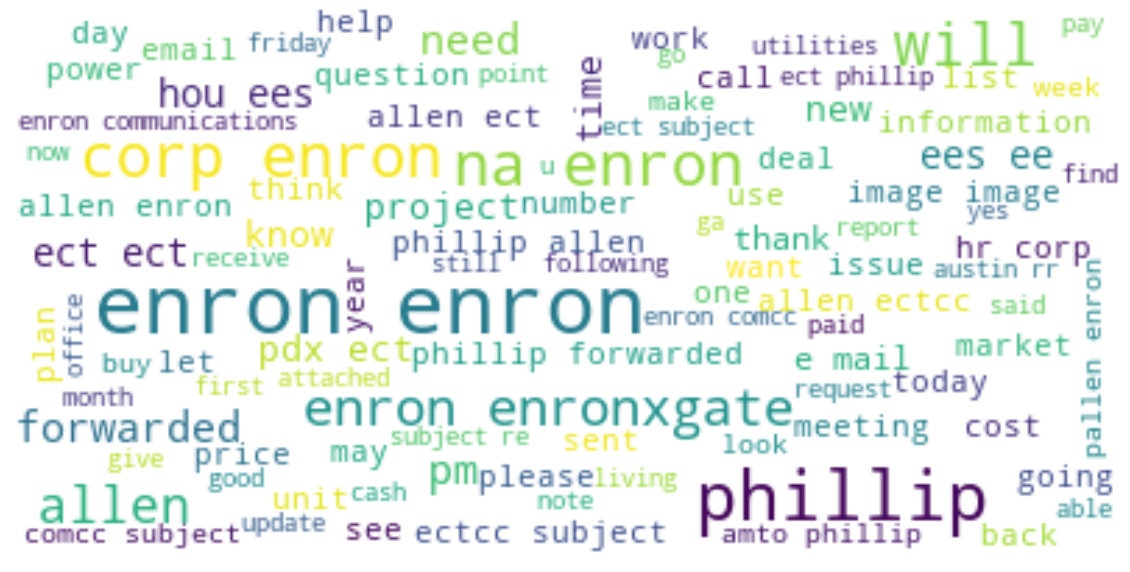

In [80]:
#understanding the word frequrncy in the body of the email
wordcloud_freq = WordCloud(background_color="white",max_font_size=30, max_words=100).generate(final_text_content)
plt.figure(figsize = (20,20))
plt.imshow(wordcloud_freq, interpolation='bilinear')
plt.axis("off")
plt.show()

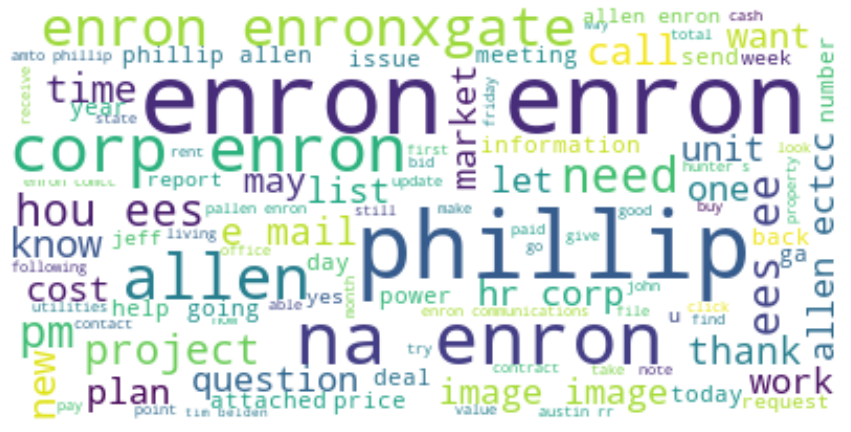

In [81]:
#removing stop words such as email,sent
stopwords = set(STOPWORDS)
stopwords.update(["subject","will","use","see","ect","said","think","please","email","sent","forwarded"])

wordcloud_freq = WordCloud(stopwords=stopwords, background_color="white", max_font_size=50, max_words=100).generate(final_text_content)

# Lines 4 to 7
plt.figure(figsize = (15,15))
plt.imshow(wordcloud_freq, interpolation='bilinear')
plt.axis("off")
plt.show()

From the above analysis we could see that the few higher frequency words in the emial body after removing some stop words

In [82]:
#filtering words not in stop words and getting count for the most occurence words in the content of the email
filtered_words_content = [word for word in final_text_content.split() if word not in stopwords]
counted_words_content = collections.Counter(filtered_words_content)

word_count_content = {}

for letter, count in counted_words_content.most_common(30):
    word_count_content[letter] = count
    
for i,j in word_count_content.items():
        print('Word: {0}, count: {1}'.format(i,j))

Word: phillip, count: 746
Word: allen, count: 502
Word: pm, count: 373
Word: gas, count: 362
Word: need, count: 249
Word: new, count: 195
Word: meeting, count: 192
Word: power, count: 190
Word: project, count: 178
Word: call, count: 172
Word: know, count: 159
Word: loan, count: 156
Word: time, count: 151
Word: work, count: 146
Word: cost, count: 146
Word: e-mail, count: 139
Word: john, count: 136
Word: j, count: 135
Word: may, count: 133
Word: price, count: 131
Word: market, count: 127
Word: want, count: 120
Word: list, count: 118
Word: land, count: 118
Word: one, count: 117
Word: amto, count: 112
Word: mike, count: 111
Word: plan, count: 109
Word: allen@ectcc, count: 108
Word: pmto, count: 106


From the above word counts we see that the Person "Phillip" has the highest frequency in the contents of the email. This could be because there are 95% of email From Phillip.
Meeting, Power, Project, Market , Plan are few high frequency words seen in the content of the emails.

#### use cases where this data might be useful:

1. The data can be used to understand and classify the email based on the Words present in the content and subject of the emails.
2. Classification of the words can be used to find any fraudualent activity in the content especially in the investment and banking organizations.
3. The data can be used to understand from which sender they receive emails most of the time.
4. We can also understand on which particular day of week the email flow is higher from the Datetime timestamp.
5. We could also filter the emails based on sender and datetime.
6. Marketing and scam emails are can be segmented by classification of the content. 